This notebook is for testing the deployed search solution.

There is a separate web app (for search by end user)

This is for internal testing after any new push (new data, new model, etc)


In [1]:
import sys
#!{sys.executable} -m pip install weaviate
!{sys.executable} -m pip install weaviate-client

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import weaviate
# IP will change
weaviate_url = 'http://34.67.249.252:8080/'
secret = weaviate.AuthClientPassword("admin", "admin")
client = weaviate.Client(weaviate_url, secret)

In [3]:
# helper function
def prettify(json_dict): 
    print(json.dumps(json_dict, indent=2))

In [ ]:
# if need to check on schema

prettify(client.schema.get())

ACTUAL TESTING


In [ ]:
prettify(client.data_object.get('37fc9284-09e1-4251-ba21-b8946a4aca4c', with_vector=False))

In [4]:
# asin for a ring
get_product_query = """
{
    Get{
      Product(
        nearText: {
          concepts: ["Wedding Band"],
          certainty: 0.7
        }
      ){
        description, title, asin
      }
    }
  }
  """

In [5]:
query_result = client.query.raw(get_product_query)
print(query_result)

{'data': {'Get': {'Product': [{'asin': 'B0000AWYXK', 'description': 'With its smooth surface and high polish, this white gold wedding band is a stylish start to any marriage. The width of the ring is slightly rounded and the edges are straight, making the band appear more substantial while allowing it to sit comfortably. 14k gold is a durable fine metal, meaning this wedding band will last as long as your love.', 'title': '14k White Gold 8mm Half Round Plain Wedding Band'}, {'asin': 'B0000AWXMM', 'description': 'With its smooth surface and high polish, this white gold wedding band is a stylish start to any marriage. The width of the ring is slightly rounded and the edges are straight, making the band appear more substantial while allowing it to sit comfortably. 14k gold is a durable fine metal, meaning this wedding band will last as long as your love.', 'title': '14k Gold 4mm Half Round Plain Wedding Band'}, {'asin': 'B0000AWXMM', 'description': 'With its smooth surface and high polish

In [ ]:
Wedding band ASINs images
B0000AWYXK  B0000AWXMM  B0000EVXVQ B0001KHRKU

In [12]:
ls *B0000AWXMM*

img-B0000AWXMM.jpg


available images:  img-B0000AWYXK.jpg
img-B0000AWXMM.jpg

In [15]:
# image search - get product info
img_query = """
{
    Get {
        Image(limit: 2) {
        image
        ofProduct {
            ... on Product {
                title
                description
                asin
                }
            }
        }
    }
}
"""

In [16]:
query_result = client.query.raw(img_query)
print(query_result)

{'data': {'Get': {'Image': [{'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCAH0AeoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD7LooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigA

The following simulates an image search

we start with an image (it is specified in the nearImage below

then compare it and get the actual product title and ids 

In [32]:
nearImage = {
    "image" :'/home/sridiyer/raw_data/amznFashionImgs/img-B0000AWYXK.jpg'
}

In [33]:
res = client.query.get(
        "Image", ["name", "ofProduct{... on Product{title}}"]
    ).with_near_image(
        nearImage, encode=True
    ).with_limit(3).do()

In [34]:
print(res)

{'data': {'Get': {'Image': [{'name': 'img-B0000AWYXK.jpg', 'ofProduct': [{'title': '14k White Gold 8mm Half Round Plain Wedding Band'}]}, {'name': 'img-B0000EVVQ8.jpg', 'ofProduct': [{'title': 'Platinum 6mm Comfort Fit Plain Wedding Band'}]}, {'name': 'img-B0000EVXVG.jpg', 'ofProduct': [{'title': '14k White Gold Engraved Plain Wedding Band'}]}]}}}


Comparing search image and matched products

In [37]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image used for search query

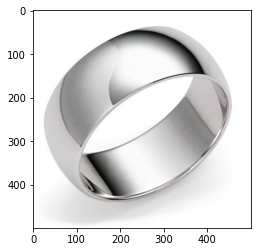

In [39]:
plt.imshow(mpimg.imread('/home/sridiyer/raw_data/amznFashionImgs/img-B0000AWYXK.jpg'))

one of the matched images

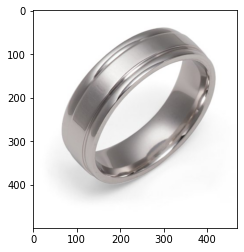

In [40]:
plt.imshow(mpimg.imread('/home/sridiyer/raw_data/amznFashionImgs/img-B0000EVXVG.jpg'))